In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
from datetime import timedelta

%matplotlib inline

In [6]:
"""
download the patchseq log google doc mouse page as a csv

the data will need to be cleaned up a bit in excel

1. erase all rows that are controls or blanks
2. erase all rows without values for >400
3. add P1 to rows that don't have user name
4. select patch duration column and change all text entries to blanks and then change the format to 
number
5. change the layer column to text and then change all Feb 3 to 2/3 etc. 
6. add column called ">400 normalized to 21 pcr cycles" that =IF(BB2=18, AW2*8,AW2)
7. delete the P8 (or any others) that have a ratio > 1
8. change BRL to P5
9. change file type to xlsx and save as 'Patch-seq log - Mouse PatchSeq.xlsx'
"""

df = pd.read_excel('Patch-seq log - Mouse PatchSeq.xlsx')

In [7]:
#go ahead and look at the dataframe
df.head()

,Date,User,Rig #,File,Ephys,Trans,Morph,Pilot,Pilot Details,cell type,...,Plate,Comments,Stacis call for reconstructions,Stacis call for class,Confidence,Bad dates,Notes.1,Unnamed: 75,Unnamed: 76,Unnamed: 77
0,160318,P5,NaN,Ndnf - brl_160318_04,x,x,y,NaN,NaN,tdt+,...,na,NaN,NaN,na,NaN,NaN,NaN,NaN,NaN,NaN
1,160318,P5,NaN,Ndnf - brl_160318_07,x,x,y,NaN,NaN,tdt+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,160318,P5,NaN,Ndnf - brl_160318_x,NaN,x,n,NaN,NaN,tdt+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,160318,P5,NaN,Ndnf - brl_160318_08,x,NaN,n,NaN,NaN,tdt+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,160406,P5,NaN,Ndnf - brl_160406_02,x,x,n,NaN,NaN,tdt+,...,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN


In [8]:
"""
More formatting and data cleaning
"""

df['date_format'] = df['Date'].map(lambda x: pd.to_datetime(x, format = '%y%m%d'))

dic = {
    'No-Seal' : 'No-Seal',
    'Partial-Nucleus': 'Partial-Nucleus',
    'Outside-Out': 'Outside-Out',
    'nr': 'missing',
    'Nucleated': 'Nucleated',
    'Entire-Cell': "Entire-Cell",
    'outside-out':'Outside-Out',
    'Outside-Out?': 'Outside-Out',
    'no-seal': 'No-Seal',
    'nucelated': 'Nucleated',
    'no -seal': 'No-Seal',
    'missing': 'missing',
    'nan': 'missing',
    'nucleus_absent': 'Partial-Nucleus',
    'nucleus_present': 'Nucleated',
    'no_nucleus_visible': 'No-Seal',
    'nucleus_visible': 'No-Seal',
    'entire_cell': 'Entire-Cell'
    }


did = {
    'P1': 'P1',
    'P2': 'P2',
    'P3': 'P3',
    'P4': 'P4',
    'P5': 'P5',
    'P6': 'P6',
    'P6 ': 'P6',
    'P8': 'P8',
    'P9': 'P9',
    'PA': 'PA',
    'PB': 'PB'
}

die = {
    'n': 'No',
    'z': 'N/A',
    'y': 'Yes',
    'na': 'N/A',
    'q': 'Questionable',
    'x': 'Yes',
    '?': 'Questionable',
    ' n': 'No'
}


df['Post patch?'] = df['Post patch?'].fillna('missing')
df['Post patch?'] = df['Post patch?'].map(lambda x: dic[x])

df['Morph'] = df['Morph'].fillna('n')
df['patch duration'] = df['patch duration'].fillna(0)

df['User'] = df['User'].map(lambda x: did[x])
df['Morph'] = df['Morph'].map(lambda x: die[x])

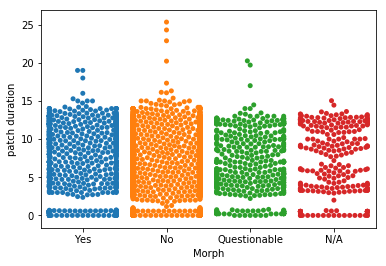

In [9]:
sns.swarmplot(x = 'Morph', y = 'patch duration', data = df)

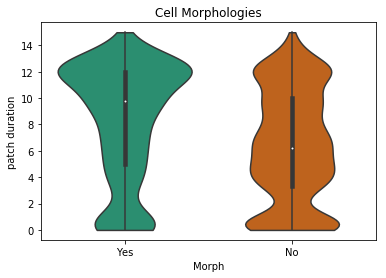

In [10]:
sns.violinplot(x = 'Morph', y = 'patch duration', data = df[(df['patch duration'] <=15) & (df['Morph'] != "Questionable") & (df['Morph'] != 'N/A')], 
               scale = 'area', cut = 0, palette = 'Dark2').set_title('Cell Morphologies')

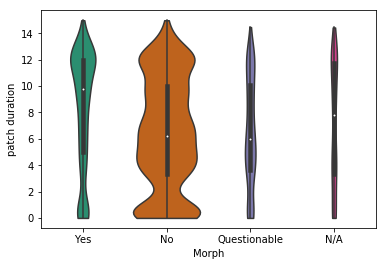

In [11]:
"""
A different way to scale the violin plots based on the total number of items,
not just per category
"""

sns.violinplot(x = 'Morph', y = 'patch duration', 
               data = df[df['patch duration'] <=15], scale = 'count', 
               cut = 0, palette = 'Dark2')

In [12]:
print 'Cell', round(float(len(df[df['Morph'] == 'Yes']))/len(df) * 100,2), '%'
print 'No Cell', round(float(len(df[df['Morph'] == 'No']))/len(df) * 100,2), '%'


Cell 23.13 %
No Cell 61.5 %


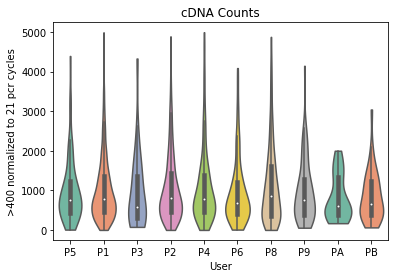

In [21]:
sns.violinplot(x = 'User', y = '>400 normalized to 21 pcr cycles', 
               data = df[df['>400 normalized to 21 pcr cycles'] < 5000],
               scale = 'area', cut = 0, palette = 'Set2').set_title('cDNA Counts')
plt.savefig('violinplot.png')

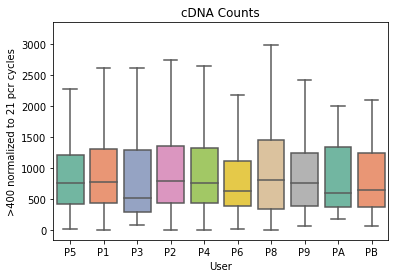

In [20]:
sns.boxplot(x = 'User', y = '>400 normalized to 21 pcr cycles', 
               data = df[df['>400 normalized to 21 pcr cycles'] < 3200],
               fliersize = 0, palette = 'Set2').set_title('cDNA Counts')
plt.savefig('boxplot.png')

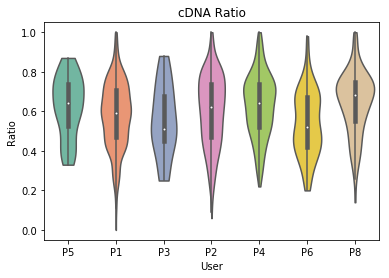

In [128]:
sns.violinplot(x = 'User', y = 'Ratio', 
               data = df, scale = 'area', 
               cut = 0, palette = 'Set2').set_title('cDNA Ratio')

In [129]:
columns  = [
            'date', 
            'preps',
            'cells', 
            'avg_ratio',
            'avg_<400',
            'avg_>400', 
            'std_ratio', 
            'std_<400', 
            'std_>400',
            'min_ratio',
            'max_ratio'
           ]

df_date = pd.DataFrame(columns = columns )

for i, date in enumerate(df['Date'].unique()):
    temp = df[df['Date'] == date]
    preps = len(temp)
    cells = len(temp)
    avg_ratio = temp['Ratio'].mean()
    avg_L400 = temp['<400'].mean()
    avg_G400 = temp['>400'].mean()
    std_ratio = temp['Ratio'].std()
    std_L400 = temp['<400'].std()
    std_G400 = temp['>400'].std()
    min_ratio = temp['Ratio'].min()
    max_ratio = temp['Ratio'].max()
    df_date.loc[i] = [date, 
                       preps, 
                       cells, 
                       avg_ratio, 
                       avg_L400, 
                       avg_G400, 
                       std_ratio, 
                       std_L400, 
                       std_G400,
                       min_ratio,
                       max_ratio]

In [130]:
df_date.head()

,date,preps,cells,avg_ratio,avg_<400,avg_>400,std_ratio,std_<400,std_>400,min_ratio,max_ratio
0,160318.0,4.0,4.0,0.820000,59.152500,200.000000,0.017321,15.277206,139.551663,0.81,0.84
1,160406.0,8.0,8.0,0.665000,57.362500,92.391250,0.132023,29.897937,45.450646,0.52,0.87
2,160407.0,9.0,9.0,0.780000,23.153333,74.081111,0.060000,9.874671,52.151243,0.73,0.88
3,160408.0,7.0,7.0,0.551429,110.285714,144.285714,0.229523,56.544125,81.873305,0.12,0.75
4,160411.0,13.0,13.0,0.656000,124.630769,115.692308,0.081731,91.560933,110.595903,0.58,0.79


In [131]:
"""
needs cleaning in excel for this to work
"""

df['prep'] = df['Slice (Lims ID?)'].map(lambda x: x.split('-')[-1].split('.')[0])
columns  = [
            'prep',
            'cells', 
            'avg_ratio',
            'avg_<400',
            'avg_>400', 
            'std_ratio', 
            'std_<400', 
            'std_>400'
           ]

df_prep = pd.DataFrame(columns = columns )

for i, prep in enumerate(df['prep'].unique()):
    temp = df[df['prep'] == prep]
    cells = len(temp)
    avg_ratio = temp['Ratio'].mean()
    avg_L400 = temp['<400'].mean()
    avg_G400 = temp['>400'].mean()
    std_ratio = temp['Ratio'].std()
    std_L400 = temp['<400'].std()
    std_G400 = temp['>400'].std()
    df_prep.loc[i] = [prep, 
                       cells, 
                       avg_ratio, 
                       avg_L400, 
                       avg_G400, 
                       std_ratio, 
                       std_L400, 
                       std_G400]
    
df_prep.head()

AttributeError: 'float' object has no attribute 'split'

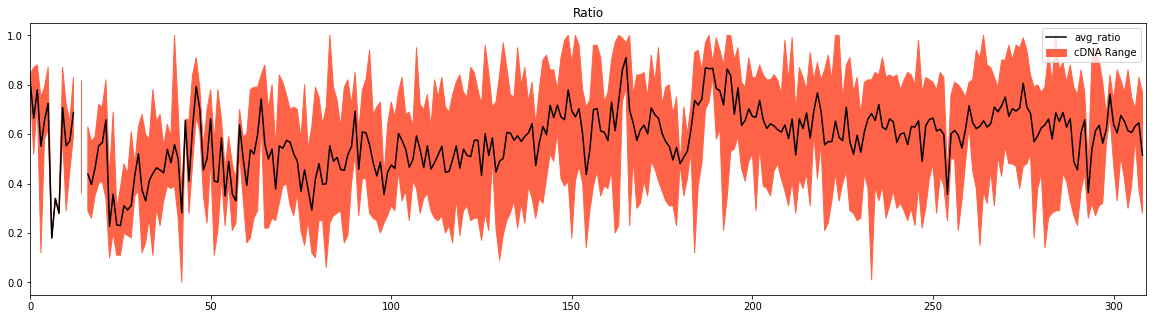

In [150]:
"""
WON'T WORK UNTIL DATA CLEANED!
"""

plt.figure(figsize =(20,5))
plt.plot(np.arange(0, len(df_date)), df_date['avg_ratio'], color = 'black')
"""plt.fill_between(np.arange(0, len(df_prep)), 
                df_prep['avg_ratio'] - df_prep['std_ratio'], 
                df_prep['avg_ratio'] + df_prep['std_ratio'],
                color = 'tomato',
                label = 'Standard Deviation')"""
plt.fill_between(np.arange(0, len(df_date)), 
                df_date['min_ratio'], df_date['max_ratio'],
                color = 'tomato',
                label = 'cDNA Range')
plt.xlim(0,len(df_date))
plt.title('Ratio')
plt.legend()


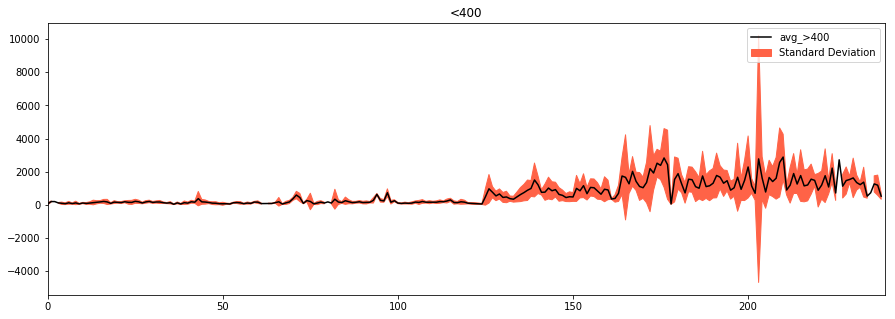

In [123]:
"""
WON'T WORK UNTIL DATA CLEANED!
"""

plt.figure(figsize =(15,5))
plt.plot(np.arange(0, len(df_prep)), df_prep['avg_>400'], color = 'black')
plt.fill_between(np.arange(0, len(df_prep)), 
                df_prep['avg_>400'] - df_prep['std_>400'], 
                df_prep['avg_>400'] + df_prep['std_>400'],
                color = 'tomato', 
                label = 'Standard Deviation')
plt.xlim(0,len(df_prep))
plt.title('<400')
plt.legend()


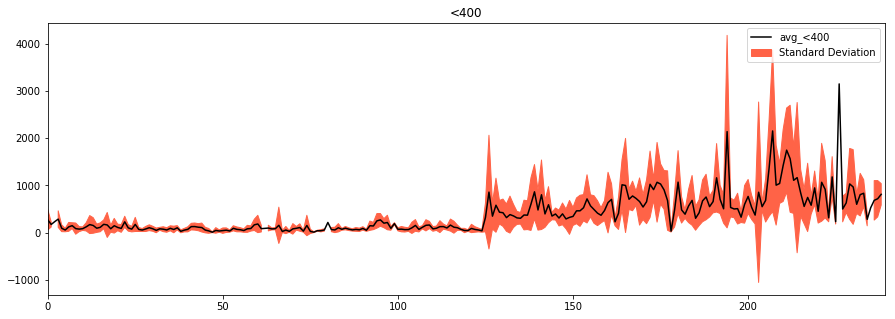

In [124]:
"""
WON'T WORK UNTIL DATA CLEANED!
"""

plt.figure(figsize =(15,5))
plt.plot(np.arange(0, len(df_prep)), df_prep['avg_<400'], color = 'black')
plt.fill_between(np.arange(0, len(df_prep)), 
                df_prep['avg_<400'] - df_prep['std_<400'], 
                df_prep['avg_<400'] + df_prep['std_<400'],
                color = 'tomato',
                label = "Standard Deviation")
plt.xlim(0,len(df_prep))
plt.title('<400')
plt.legend()

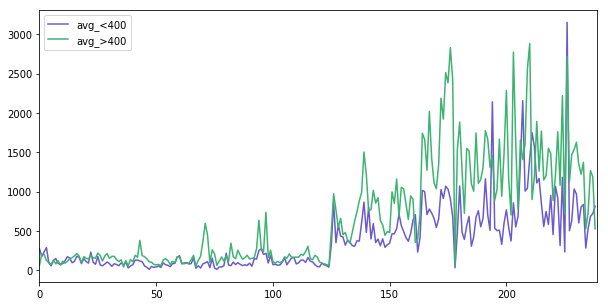

In [125]:
"""
WON'T WORK UNTIL DATA CLEANED!
"""

plt.figure(figsize =(10,5))
plt.plot(np.arange(0,len(df_prep)),df_prep['avg_<400'], color = 'slateblue')
plt.plot(np.arange(0,len(df_prep)),df_prep['avg_>400'], color = 'mediumseagreen')
plt.xlim(0,len(df_prep))
plt.legend()

In [13]:
plt.figure(figsize =(20,5))

x = np.arange(0,len(df_prep))
y1 = df_prep['avg_<400']
y2 = df_prep['avg_>400']

plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='royalblue', interpolate=True, label = 'More Big cDNA')
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True, label = 'More Contamination?')

plt.xlim(0,len(df_prep))
plt.legend()
plt.title('cDNA Reads by Mouse Prep')
plt.ylabel('Number of Reads')

NameError: name 'df_prep' is not defined

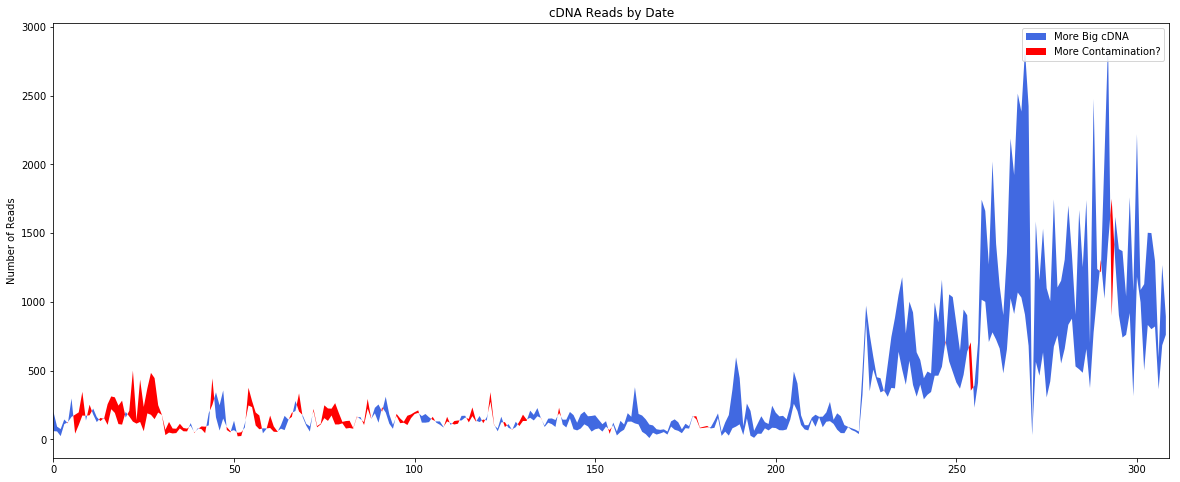

In [132]:
plt.figure(figsize =(20,8))

x = np.arange(0,len(df_date))
y1 = df_date['avg_<400']
y2 = df_date['avg_>400']

plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='royalblue', interpolate=True, label = 'More Big cDNA')
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True, label = 'More Contamination?')

plt.xlim(0,len(df_date))
plt.legend()
plt.title('cDNA Reads by Date')
plt.ylabel('Number of Reads')
#plt.yticks()
#sns.despine()
#plt.savefig('cDNA Reads by Date.png')

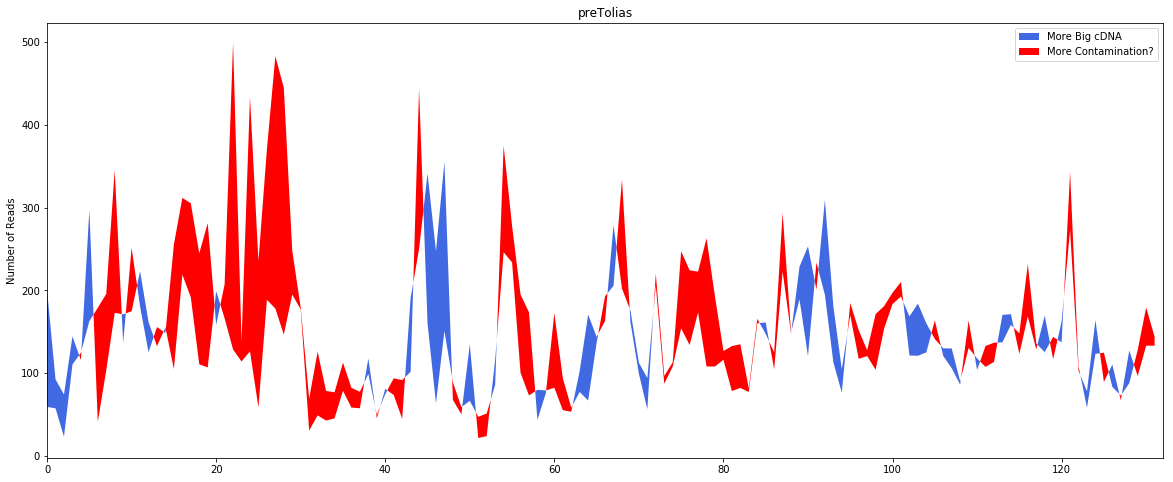

In [133]:
start = 160317
end = 161104
title = 'preTolias'

plt.figure(figsize =(20,8))

x = np.arange(0,len(df_date[(df_date['date'] > start) & (df_date['date'] < end)]))
y1 = df_date[(df_date['date'] > start) & (df_date['date'] < end)]['avg_<400']
y2 = df_date[(df_date['date'] > start) & (df_date['date'] < end)]['avg_>400']

#plt.yscale('log')
plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='royalblue', interpolate=True, label = 'More Big cDNA')
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True, label = 'More Contamination?')



plt.xlim(0,len(df_date[(df_date['date'] > start) & (df_date['date'] < end)]))
#plt.ylim(0, )
plt.legend()
plt.title(title)
plt.ylabel('Number of Reads')

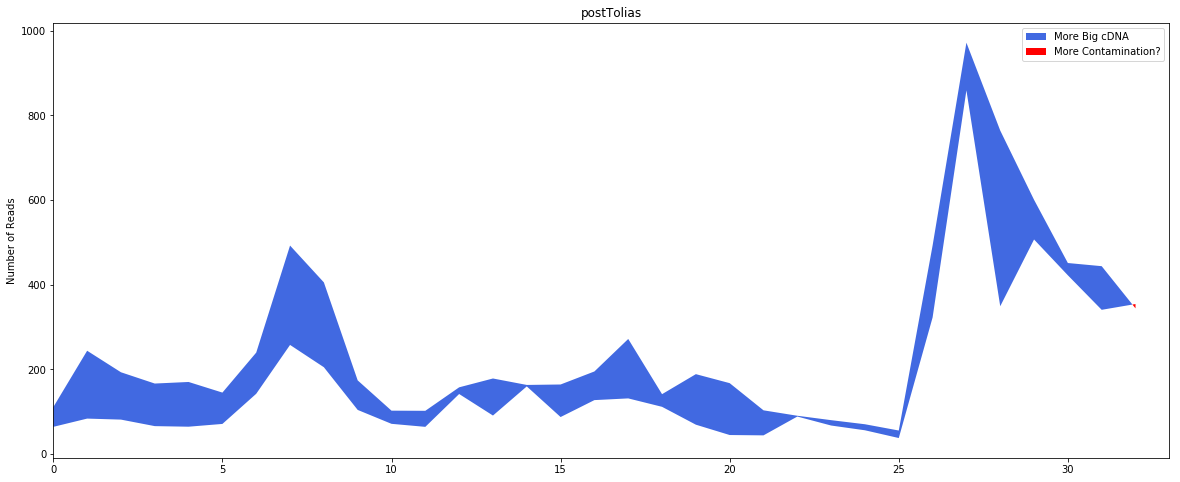

In [134]:
start = 170313
end = 170428
title = 'postTolias'

plt.figure(figsize =(20,8))

x = np.arange(0,len(df_date[(df_date['date'] > start) & (df_date['date'] < end)]))
y1 = df_date[(df_date['date'] > start) & (df_date['date'] < end)]['avg_<400']
y2 = df_date[(df_date['date'] > start) & (df_date['date'] < end)]['avg_>400']

plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='royalblue', interpolate=True, label = 'More Big cDNA')
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True, label = 'More Contamination?')



plt.xlim(0,len(df_date[(df_date['date'] > start) & (df_date['date'] < end)]))
#plt.ylim(0, )
plt.legend()
plt.title(title)
plt.ylabel('Number of Reads')
#plt.xaxis.set_ticks(df_date[(df_date['date'] > start) & (df_date['date'] < end)]['date'])


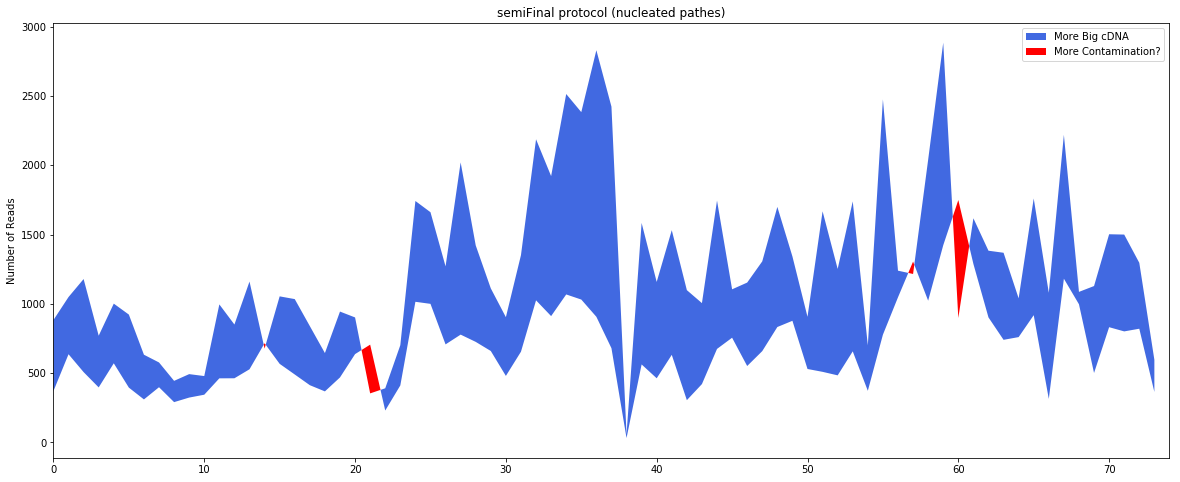

In [135]:
start = 170501
end = 170831
title = 'semiFinal protocol (nucleated pathes)'

plt.figure(figsize =(20,8))

x = np.arange(0,len(df_date[(df_date['date'] > start) & (df_date['date'] < end)]))
y1 = df_date[(df_date['date'] > start) & (df_date['date'] < end)]['avg_<400']
y2 = df_date[(df_date['date'] > start) & (df_date['date'] < end)]['avg_>400']

plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='royalblue', interpolate=True, label = 'More Big cDNA')
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True, label = 'More Contamination?')



plt.xlim(0,len(df_date[(df_date['date'] > start) & (df_date['date'] < end)]))
#plt.ylim(0, )
plt.legend()
plt.title(title)
plt.ylabel('Number of Reads')

In [33]:
"""
Let's try redoing the date dataframe with a spot for everyday
and gaps for the days we didn't record
"""
columns  = [
            'date', 
            'preps',
            'cells', 
            'avg_ratio',
            'avg_<400',
            'avg_>400',
            'avg_<400_n',
            'avg_>400_n',
            'std_ratio', 
            'std_<400', 
            'std_>400'
           ]

df_date = pd.DataFrame(columns = columns )

start_date = df['Date'].min()
end_date = df['Date'].max()

start_dated = datetime.strptime(str(start_date), '%y%m%d')
end_dated = datetime.strptime(str(end_date), '%y%m%d')

i = 0
dated = start_dated
while dated <= end_dated:
    date = datetime.strftime(dated, '%y%m%d')
    temp = df[df['Date'] == int(date)]
    preps = len(temp)
    cells = len(temp)
    avg_ratio = temp['Ratio'].mean()
    avg_L400 = temp['<400'].mean()
    avg_G400 = temp['>400'].mean()
    avg_L400_n = temp['<400 normalized to 21 pcr cycles'].mean()
    avg_G400_n = temp['>400 normalized to 21 pcr cycles'].mean()
    std_ratio = temp['Ratio'].std()
    std_L400 = temp['<400'].std()
    std_G400 = temp['>400'].std()
    df_date.loc[i] = [int(date), 
                       preps, 
                       cells, 
                       avg_ratio, 
                       avg_L400, 
                       avg_G400,
                       avg_L400_n,
                       avg_G400_n,
                       std_ratio, 
                       std_L400, 
                       std_G400]
    i += 1
    dated += timedelta(days = 1)

KeyError: '<400 normalized to 21 pcr cycles'

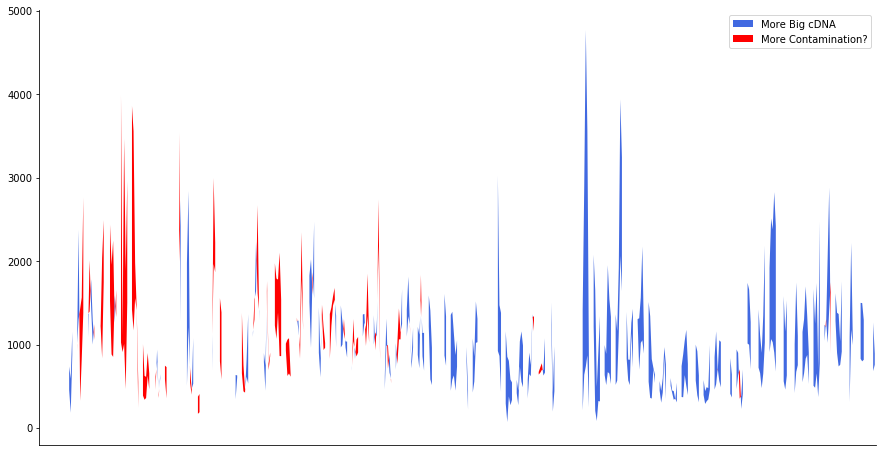

In [137]:
"""
switch avg_<400_n and avg_>400_n back to avg_<400 and avg_>400
to remove the calculated normalization
"""

plt.figure(figsize =(15,8))

x = np.arange(0,len(df_date))
y1 = df_date['avg_<400_n']
y2 = df_date['avg_>400_n']

plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='royalblue', interpolate=True, label = 'More Big cDNA')
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True, label = 'More Contamination?')

plt.xlim(0,len(df_date))
plt.legend()
#plt.title('cDNA Reads by Date')
#plt.ylabel('Number of Reads')
plt.xticks([])
sns.despine()
#plt.savefig('cDNA Reads by Date.png')

In [138]:
print df_date['date'].max()
print df_date['date'].min()

170901.0
160318.0


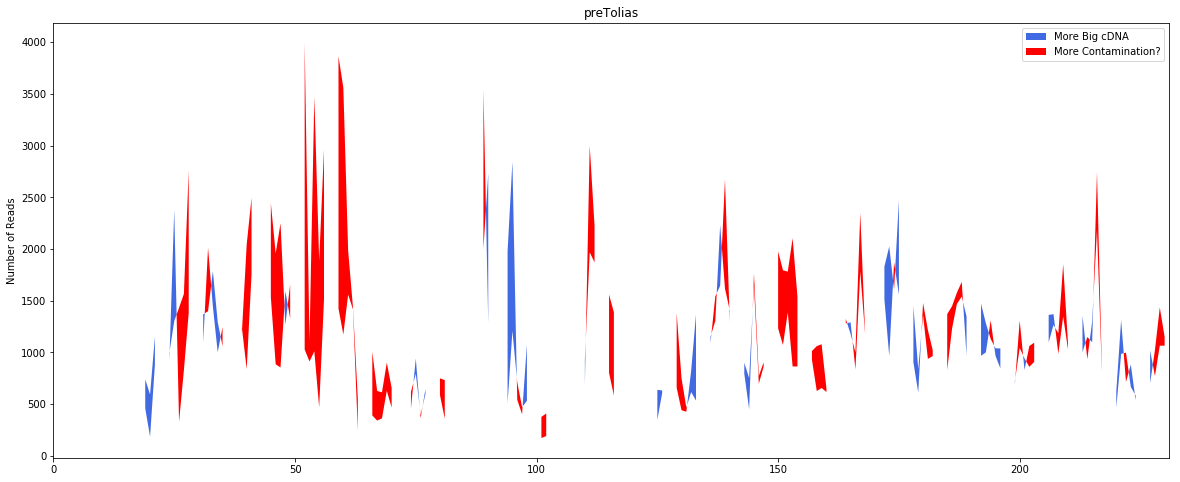

In [139]:
"""
switch avg_<400_n and avg_>400_n back to avg_<400 and avg_>400
to remove the calculated normalization
"""

start = 160317
end = 161104
title = 'preTolias'

plt.figure(figsize =(20,8))

x = np.arange(0,len(df_date[(df_date['date'] > start) & (df_date['date'] < end)]))
y1 = df_date[(df_date['date'] > start) & (df_date['date'] < end)]['avg_<400_n']
y2 = df_date[(df_date['date'] > start) & (df_date['date'] < end)]['avg_>400_n']

#plt.yscale('log')
plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='royalblue', interpolate=True, label = 'More Big cDNA')
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True, label = 'More Contamination?')



plt.xlim(0,len(df_date[(df_date['date'] > start) & (df_date['date'] < end)]))
#plt.ylim(0, )
plt.legend()
plt.title(title)
plt.ylabel('Number of Reads')

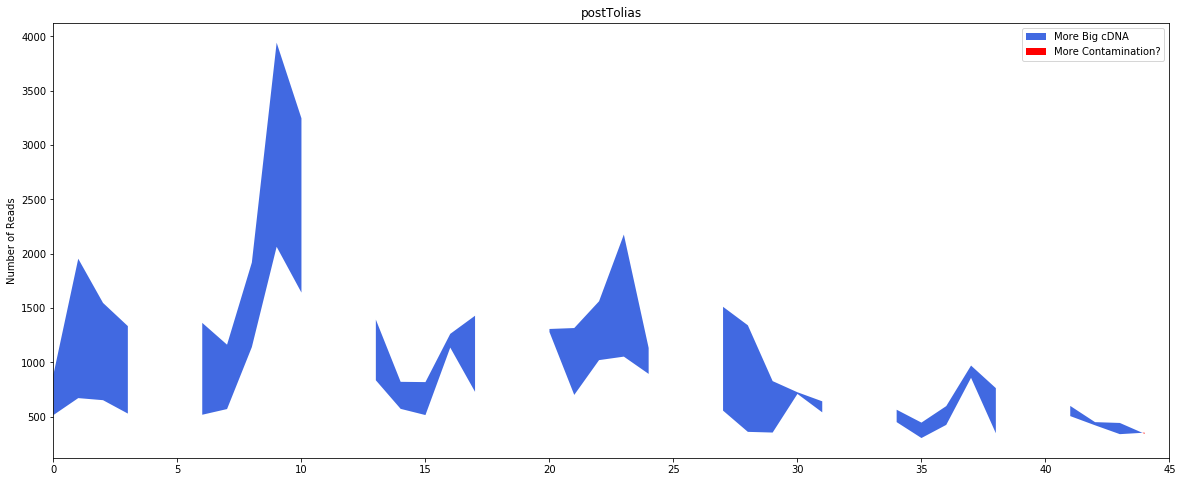

In [140]:
"""
switch avg_<400_n and avg_>400_n back to avg_<400 and avg_>400
to remove the calculated normalization
"""

start = 170313
end = 170428
title = 'postTolias'

plt.figure(figsize =(20,8))

x = np.arange(0,len(df_date[(df_date['date'] > start) & (df_date['date'] < end)]))
y1 = df_date[(df_date['date'] > start) & (df_date['date'] < end)]['avg_<400_n']
y2 = df_date[(df_date['date'] > start) & (df_date['date'] < end)]['avg_>400_n']

plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='royalblue', interpolate=True, label = 'More Big cDNA')
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True, label = 'More Contamination?')



plt.xlim(0,len(df_date[(df_date['date'] > start) & (df_date['date'] < end)]))
#plt.ylim(0, )
plt.legend()
plt.title(title)
plt.ylabel('Number of Reads')


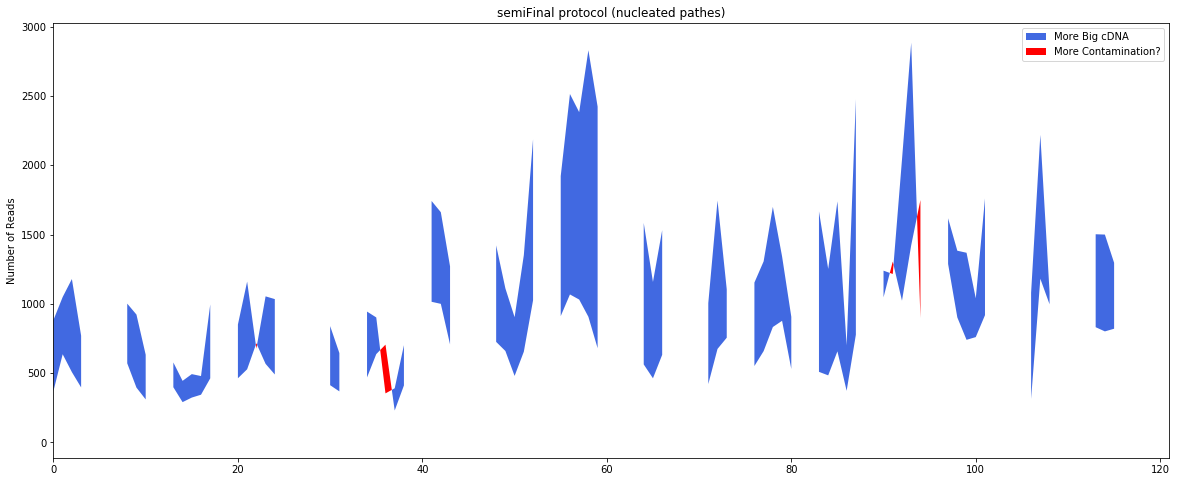

In [141]:
"""
switch avg_<400_n and avg_>400_n back to avg_<400 and avg_>400
to remove the calculated normalization
"""

start = 170501
end = 170831
title = 'semiFinal protocol (nucleated pathes)'

plt.figure(figsize =(20,8))

x = np.arange(0,len(df_date[(df_date['date'] > start) & (df_date['date'] < end)]))
y1 = df_date[(df_date['date'] > start) & (df_date['date'] < end)]['avg_<400_n']
y2 = df_date[(df_date['date'] > start) & (df_date['date'] < end)]['avg_>400_n']

plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='royalblue', interpolate=True, label = 'More Big cDNA')
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True, label = 'More Contamination?')



plt.xlim(0,len(df_date[(df_date['date'] > start) & (df_date['date'] < end)]))
#plt.ylim(0, )
plt.legend()
plt.title(title)
plt.ylabel('Number of Reads')

In [32]:
plt.figure(figsize = (20,4))
for i in df_date['date'].unique():

    try:
        i = int(i)
        height = float(len(df[(df['Date'] == i) & (df['Trans'] == 'x')])) / len(df[df["Date"] == i]) * 100
        plt.bar(datetime.strptime(str(i), '%y%m%d'), height, color = '#e7298a')
    except ZeroDivisionError:
        height = 0
sns.despine()
plt.ylabel('% Transciptomics Pass')
plt.xticks( rotation= 45)
plt.savefig('Trans_Pass_Rate.png')

NameError: name 'df_date' is not defined

In [24]:
#look at patch rate by user
colors = {
    'P1': '#a6cee3',
    'P2': '#1f78b4',
    'P3': '#b2df8a',
    'P4': '#33a02c',
    'P5': '#fb9a99',
    'P6': '#e31a1c',
    'P7': '#fdbf6f',
    'P8': '#ff7f00',
    'P9': '#cab2d6',
    'PA': '#6a3d9a',
    'PB': '#b15928'
}

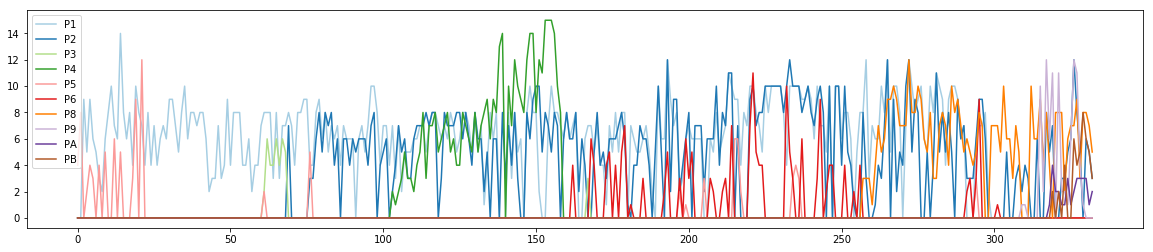

In [170]:
plt.figure(figsize = (20,4))

for i in sorted(df['User'].unique()):
    y = [len(df[(df['Date'] == date) & (df['User'] == i)]) for date in df['Date'].unique()]
    plt.plot(np.arange(0,len(df['Date'].unique())), y, color = colors[i], label = i)
    
plt.legend()

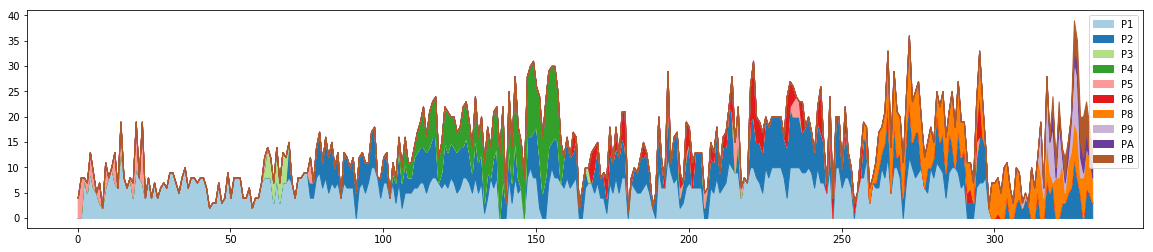

In [31]:
plt.figure(figsize = (20,4))
x = np.arange(0,len(df["Date"].unique()))
bottom = np.zeros(len(df['Date'].unique()))
for i, user in enumerate(sorted(df['User'].unique())):
    y = [len(df[(df['Date'] == date) & (df['User'] == user)]) for date in df['Date'].unique()]
    y2 = y+bottom
    plt.fill_between(x, bottom, y2, color = colors[user], label = user)
                
    bottom += y


plt.legend()

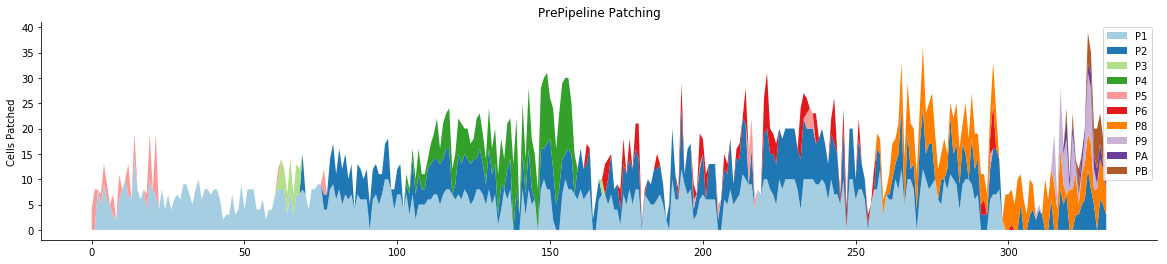

In [29]:
plt.figure(figsize = (20,4))
x = np.arange(0,len(df["Date"].unique()))
bottom = np.zeros(len(df['Date'].unique()))
for i, user in enumerate(sorted(df['User'].unique())):
    y = [len(df[(df['Date'] == date) & (df['User'] == user)]) for date in df['Date'].unique()]
    y2 = y+bottom
    plt.fill_between(x, bottom, y2,where=y2 > bottom, facecolor=colors[user], interpolate=True, label = user)
                #color = colors[user], label = user)
    bottom += y

plt.legend()
sns.despine()

plt.ylabel("Cells Patched")
plt.title('PrePipeline Patching')